In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


In [2]:
Default = pd.read_csv('Company%28FRA%29 (1).csv')


In [3]:
Default.head()


,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [4]:
Default.tail()


,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
4251,4252,0.2,0.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.4,NaN
4252,4253,93.3,159.6,86.7,172.9,0.1,169.7,3.3,18.4,3.7,...,1.80,11.00,8.28,9.88,8162700.0,10.0,0.42,0.42,159.6,16.81
4253,4254,932.2,833.8,664.6,2314.7,32.1,2151.6,195.2,348.4,303.0,...,6.08,59.28,31.14,9.87,7479762.0,10.0,26.58,26.58,833.8,5.69
4254,4255,64.6,95.0,48.5,110.5,4.6,113.5,1.6,9.7,2.6,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.0,NaN
4255,4256,0.0,384.6,111.3,345.8,11.3,341.7,15.4,57.6,20.7,...,4.71,53.37,8.33,3.74,960000.0,10.0,15.63,15.63,384.6,NaN


In [5]:

Default.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [6]:
Default.shape

(4256, 51)

In [7]:
Default.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.0,2.128500e+03,1.228746e+03,1.000000e+00,1064.750,2128.500,3.192250e+03,4.256000e+03
Networth Next Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975,72.100,3.308250e+02,8.057734e+05
Total assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,91.300,315.500,1.120800e+03,1.176509e+06
Net worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,31.475,104.800,3.898500e+02,6.131516e+05
Total income,4025.0,4.688190e+03,5.391895e+04,0.000000e+00,107.100,455.100,1.485000e+03,2.442828e+06
Change in stock,3706.0,4.370248e+01,4.369150e+02,-3.029400e+03,-1.800,1.600,1.840000e+01,1.418550e+04
Total expenses,4091.0,4.356301e+03,5.139809e+04,-1.000000e-01,96.800,426.800,1.395700e+03,2.366035e+06
Profit after tax,4102.0,2.950506e+02,3.079902e+03,-3.908300e+03,0.500,9.000,5.330000e+01,1.194391e+05
PBDITA,4102.0,6.059406e+02,5.646231e+03,-4.407000e+02,6.925,36.900,1.587000e+02,2.085765e+05
PBT,4102.0,4.102590e+02,4.217415e+03,-3.894800e+03,0.800,12.600,7.417500e+01,1.452926e+05


In [8]:
Default['default'] = np.where((Default['Networth Next Year'] > 0), 0, 1)


In [9]:
Default['default'].value_counts()


default
0    3352
1     904
Name: count, dtype: int64

In [10]:
Default['default'].value_counts(normalize = True)


default
0    0.787594
1    0.212406
Name: proportion, dtype: float64

In [11]:
Default.columns = Default.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')


In [12]:
Default.isnull().sum()


Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

In [13]:
Default.size


221312

In [14]:

Default.isnull().sum().sum()


17778

In [15]:
Default_X = Default.drop('default', axis = 1)
Default_Y = Default['default']



In [16]:
def univariateAnalysis_numeric_basic(column,nbins):   
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(Default[column], kde=True, color='g',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=Default[column])
    plt.show()

Distribution of Total_assets
----------------------------------------------------------------------------


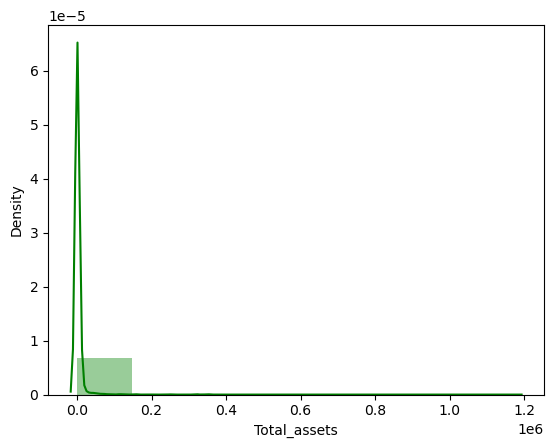

BoxPlot of Total_assets
----------------------------------------------------------------------------


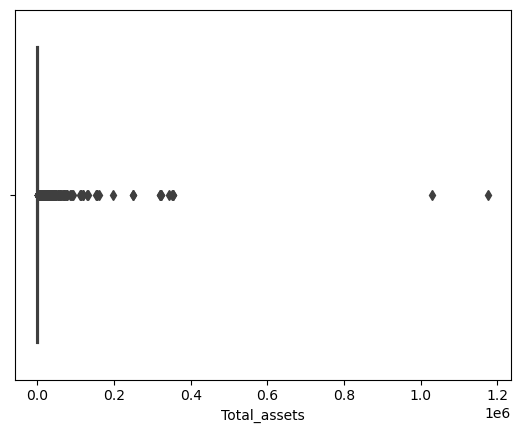

In [17]:
univariateAnalysis_numeric_basic('Total_assets',8)

Distribution of Networth_Next_Year
----------------------------------------------------------------------------


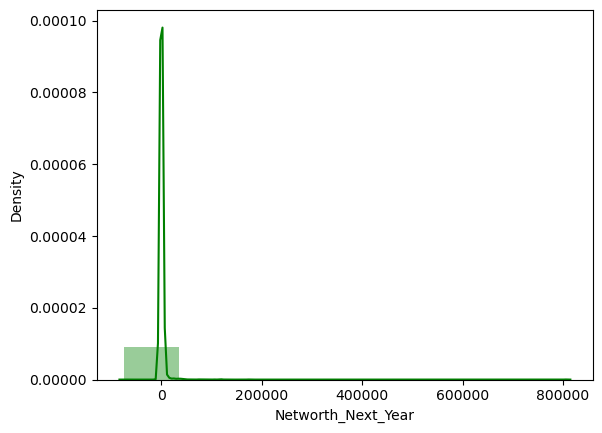

BoxPlot of Networth_Next_Year
----------------------------------------------------------------------------


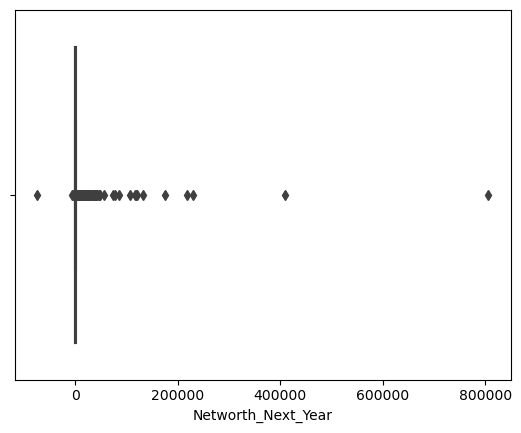

In [18]:
univariateAnalysis_numeric_basic('Networth_Next_Year',8)

ValueError: num must be an integer with 1 <= num <= 48, not 49

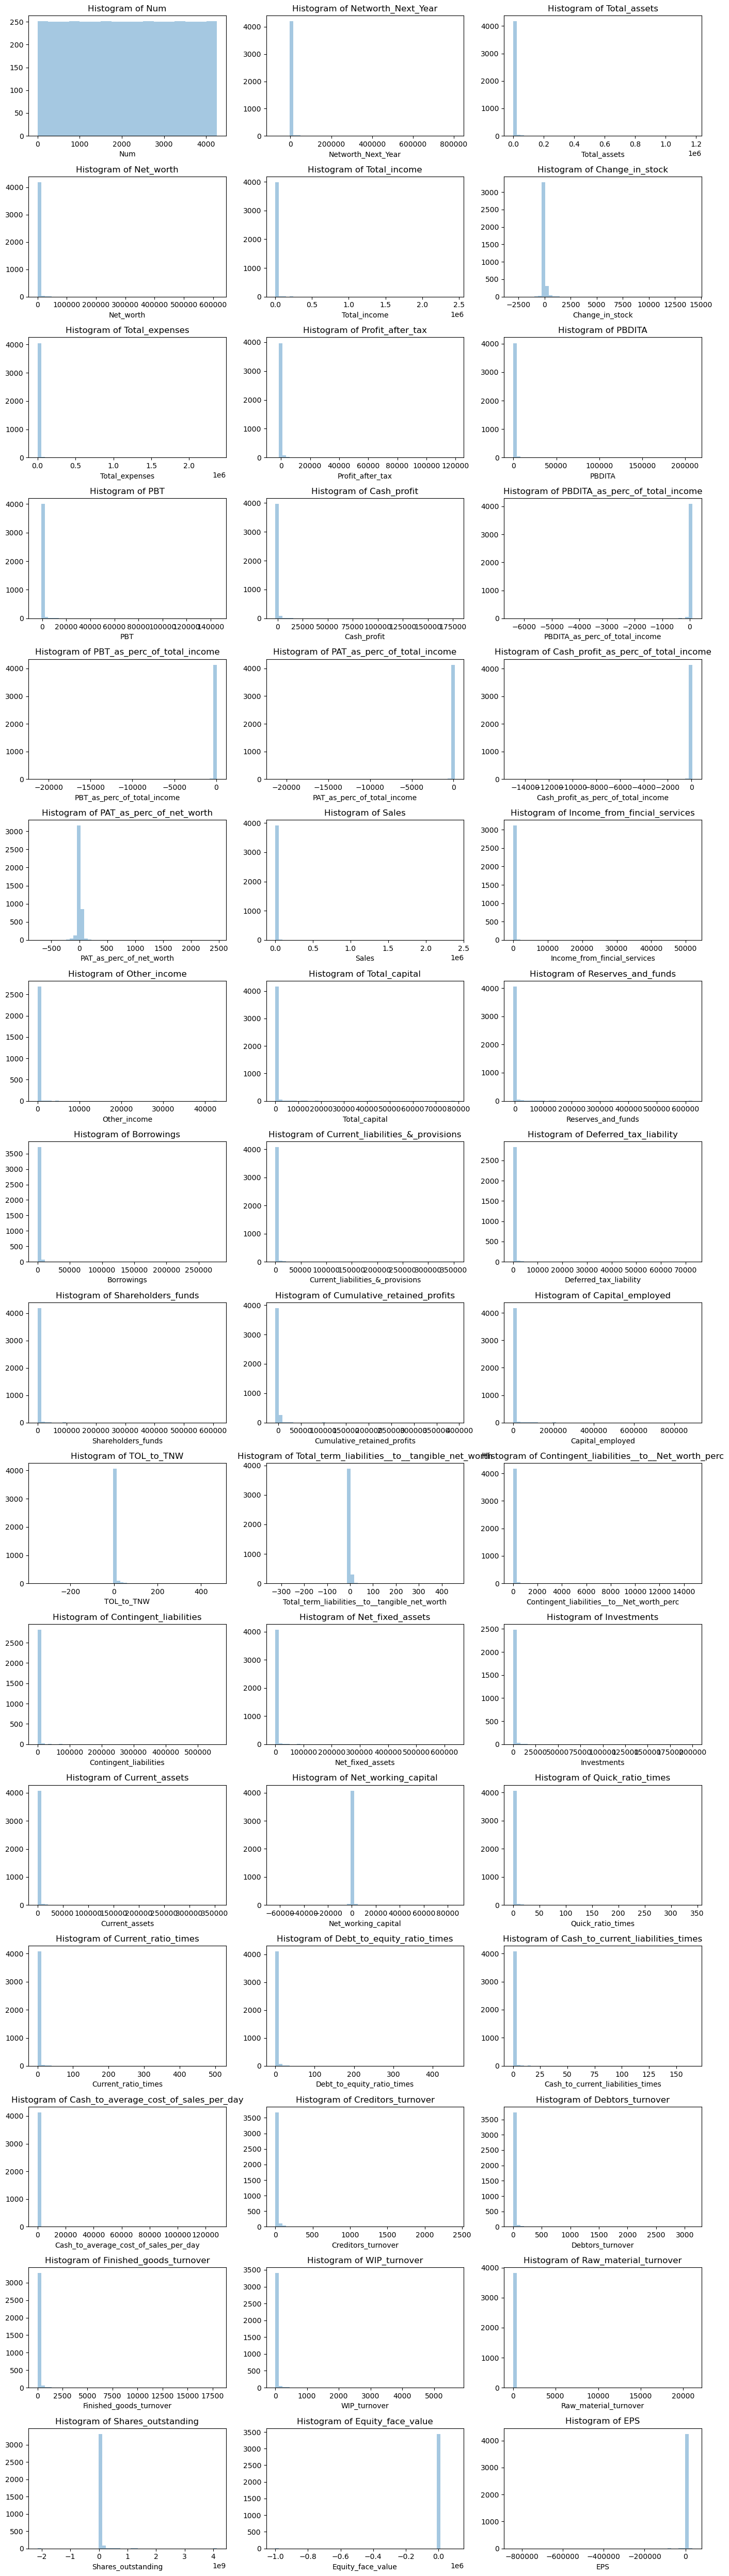

In [19]:
plt.figure(figsize = (14,50))
for i in range(len(Default.columns)):
    plt.subplot(16, 3, i+1)
    sns.distplot(Default[Default.columns[i]], kde=False)
    plt.title('Histogram of {}'.format(Default.columns[i]))
    plt.tight_layout()

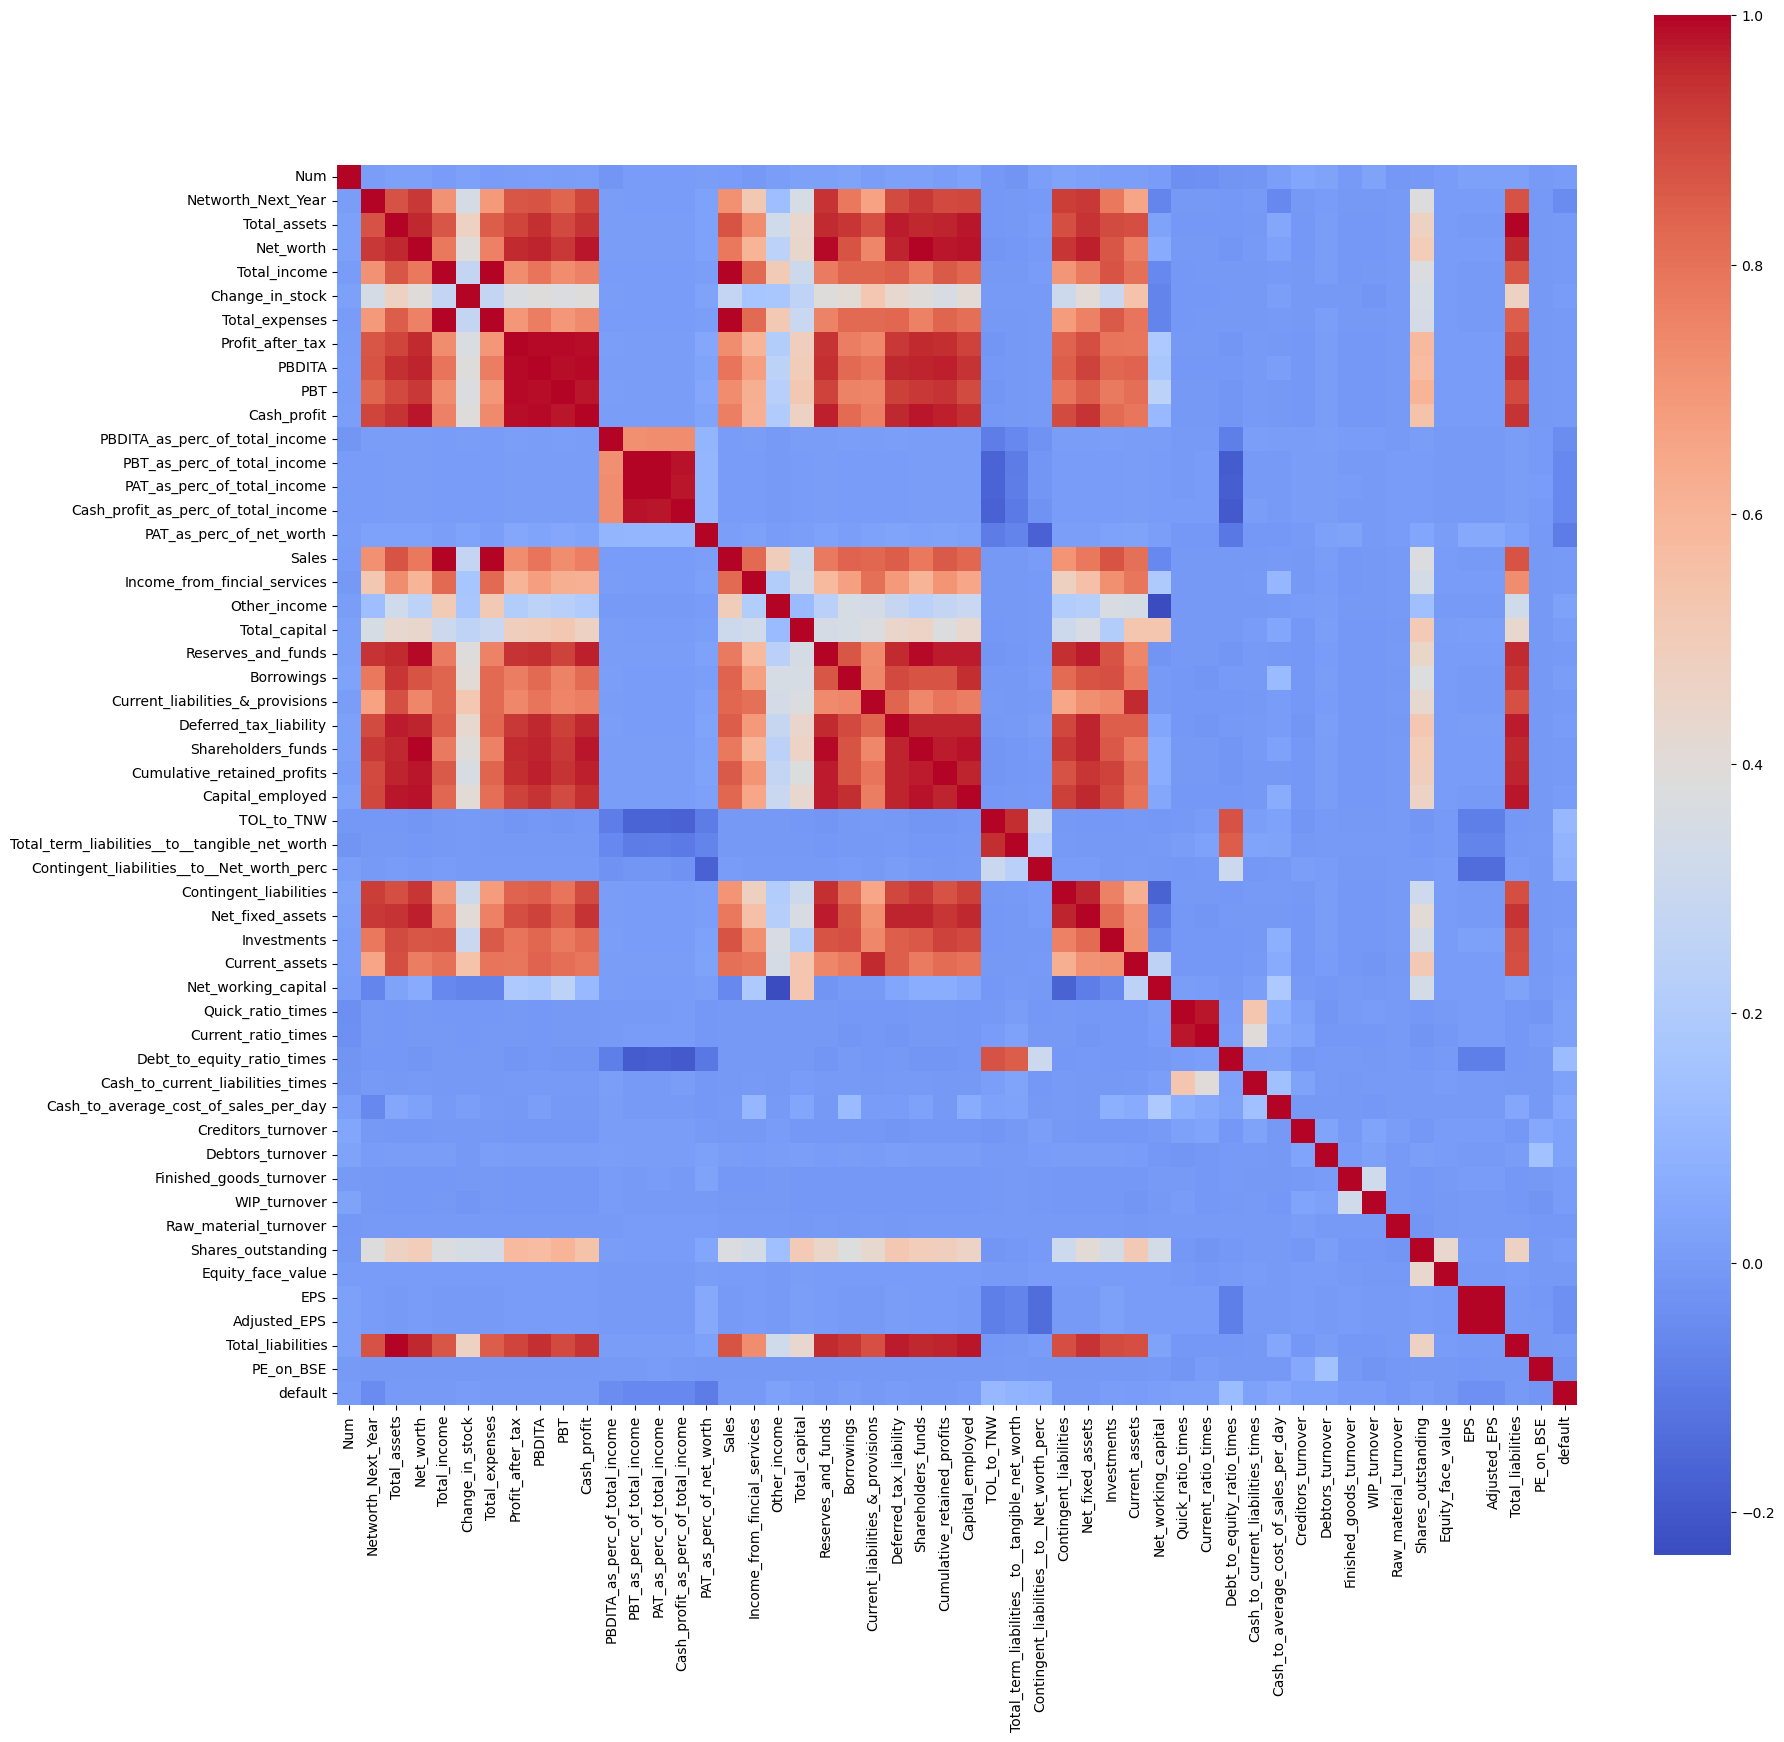

In [20]:
plt.figure(figsize=(20,20))  # setting the size of figure to 12 by 10
p=sns.heatmap(Default.corr(), annot=False,cmap='coolwarm',square=True)

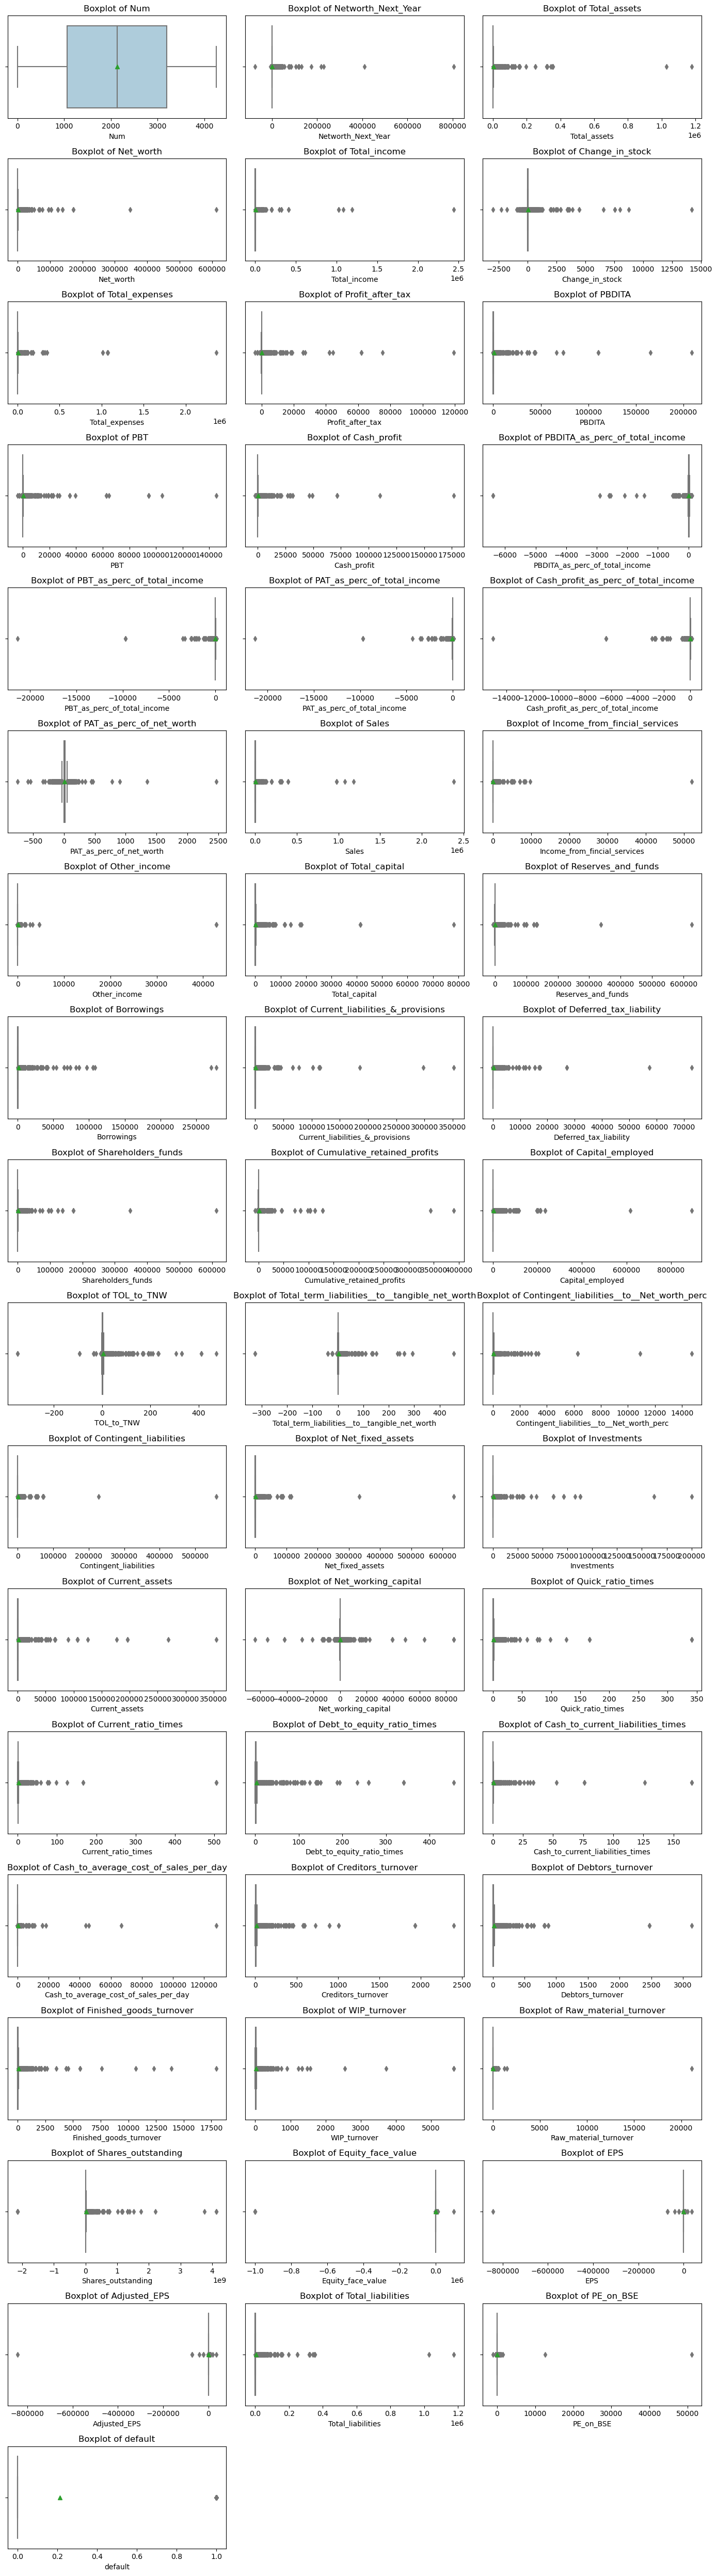

In [21]:
plt.figure(figsize = (14,50))
for i in range(len(Default.columns)):
    plt.subplot(18, 3, i+1)
    sns.boxplot(x = Default[Default.columns[i]], data = Default, showmeans = True, palette = 'Paired')
    plt.title('Boxplot of {}'.format(Default.columns[i]))
    plt.tight_layout()


In [22]:
Q1 = Default_X.quantile(0.25)
Q3 = Default_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR


In [23]:
((Default_X > UL) | (Default_X < LL)).sum()


Num                                                 0
Networth_Next_Year                                624
Total_assets                                      585
Net_worth                                         595
Total_income                                      508
Change_in_stock                                   750
Total_expenses                                    518
Profit_after_tax                                  712
PBDITA                                            584
PBT                                               704
Cash_profit                                       627
PBDITA_as_perc_of_total_income                    346
PBT_as_perc_of_total_income                       546
PAT_as_perc_of_total_income                       610
Cash_profit_as_perc_of_total_income               426
PAT_as_perc_of_net_worth                          427
Sales                                             500
Income_from_fincial_services                      517
Other_income                

In [24]:
((Default_X > UL) | (Default_X < LL)).sum().sum()


25946

In [25]:
Default_X[((Default_X > UL) | (Default_X < LL))]= np.nan


In [26]:
Default_X.isnull().sum().sum()


43724

In [27]:
43724/221312

0.19756723539618276

In [28]:
Default_X.isnull().sum(axis=1)


0        4
1        9
2        4
3       22
4        5
        ..
4251    25
4252     5
4253     9
4254     6
4255     2
Length: 4256, dtype: int64

In [29]:
Default_X.isnull().sum().sort_values(ascending = False)/Default_X.index.size


PE_on_BSE                                         0.672932
Investments                                       0.508929
Other_income                                      0.457002
Contingent_liabilities                            0.421758
Deferred_tax_liability                            0.417058
Income_from_fincial_services                      0.382519
Equity_face_value                                 0.315555
Change_in_stock                                   0.305451
Shares_outstanding                                0.302162
Finished_goods_turnover                           0.299107
WIP_turnover                                      0.268327
Borrowings                                        0.226269
Profit_after_tax                                  0.203477
PBT                                               0.201598
Net_working_capital                               0.198073
Creditors_turnover                                0.195724
Sales                                             0.1891

In [30]:
Default = Default.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)


In [31]:
Default = Default.drop(['PE_on_BSE', 'Investments', 'Other_income', 'Contingent_liabilities',
                     'Deferred_tax_liability', 'Income_from_fincial_services', 'Change_in_stock', 'Shares_outstanding'], axis = 1)


In [32]:
Default.shape

(4256, 41)

In [33]:
Default_X= Default.drop('default', axis = 1)
Default_Y= Default['default']


In [34]:
Default_X.shape

(4256, 40)

In [35]:
Default_Y.shape

(4256,)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Default = pd.DataFrame(scaler.fit_transform(Default_X), columns = Default_X.columns)


In [37]:
Default = pd.concat([Default_X, Default_Y], axis = 1)


In [38]:
from sklearn.impute import KNNImputer


In [39]:
imputer = KNNImputer(n_neighbors=10)


In [40]:
Default= pd.DataFrame(imputer.fit_transform(Default), columns = Default.columns)


In [41]:
Default.isnull().sum()


Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Shareholders_funds                                0
Cumulative_r

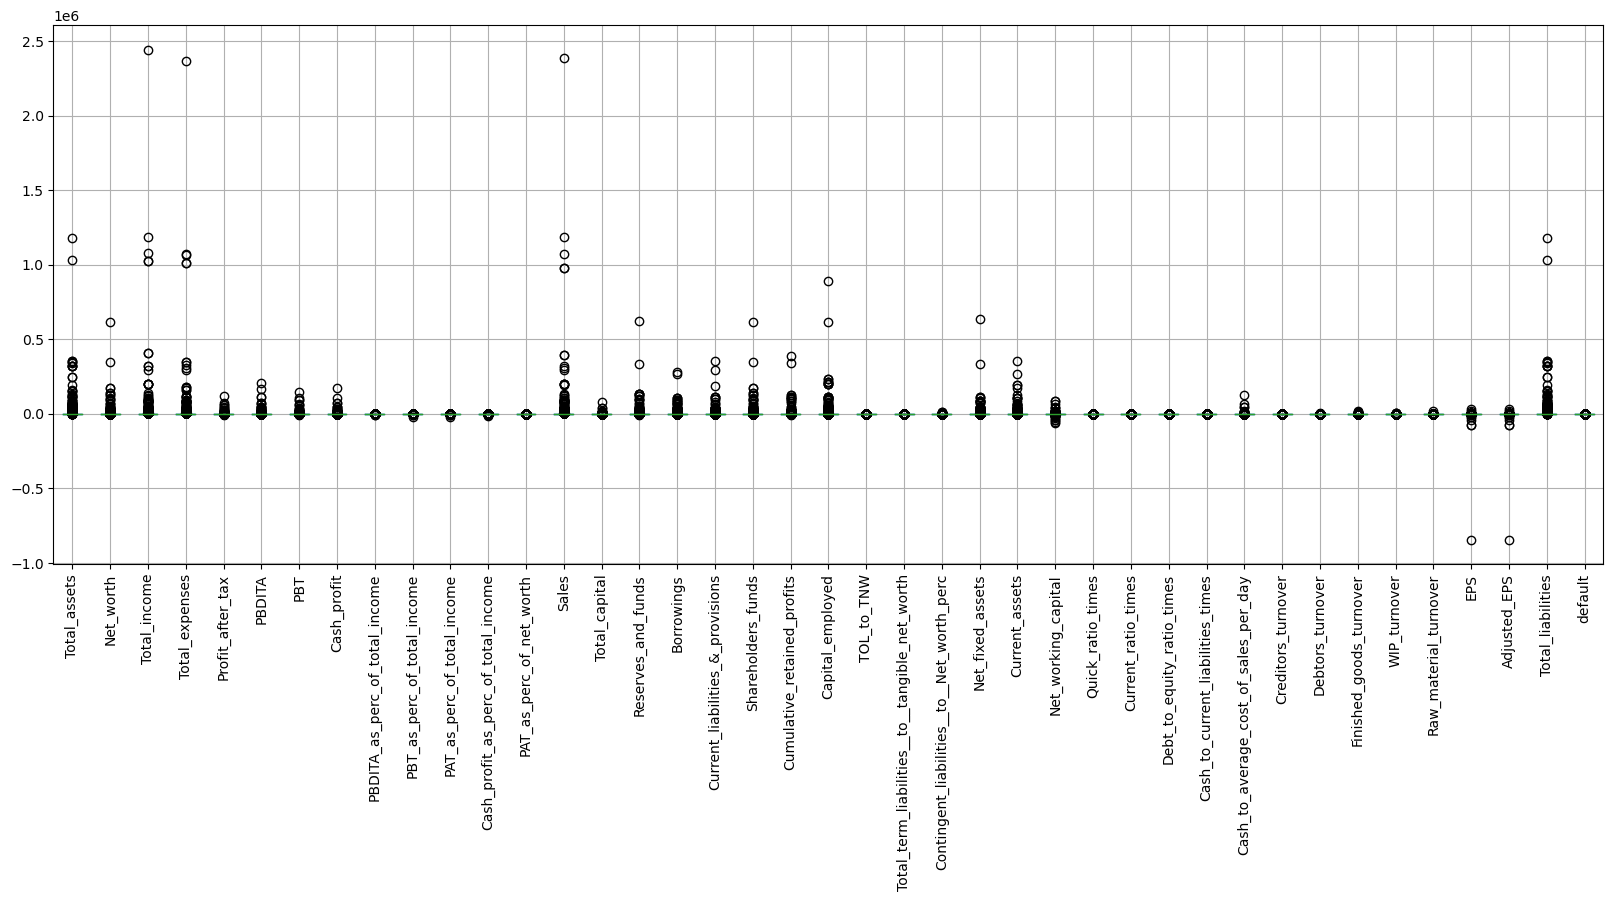

In [42]:
plt.figure(figsize=(20,7))
Default.boxplot()
plt.xticks(rotation=90)
plt.show()


In [43]:
Default_X = Default.drop(['default'], axis = 1)
Default_Y = Default['default']


In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [45]:
for column in Default_X.columns:
    lr,ur=remove_outlier(Default[column])
    Default_X[column]=np.where(Default_X[column]>ur,ur,Default_X[column])
    Default_X[column]=np.where(Default_X[column]<lr,lr,Default_X[column])


In [46]:
Default = pd.concat([Default_X, Default_Y], axis = 1)


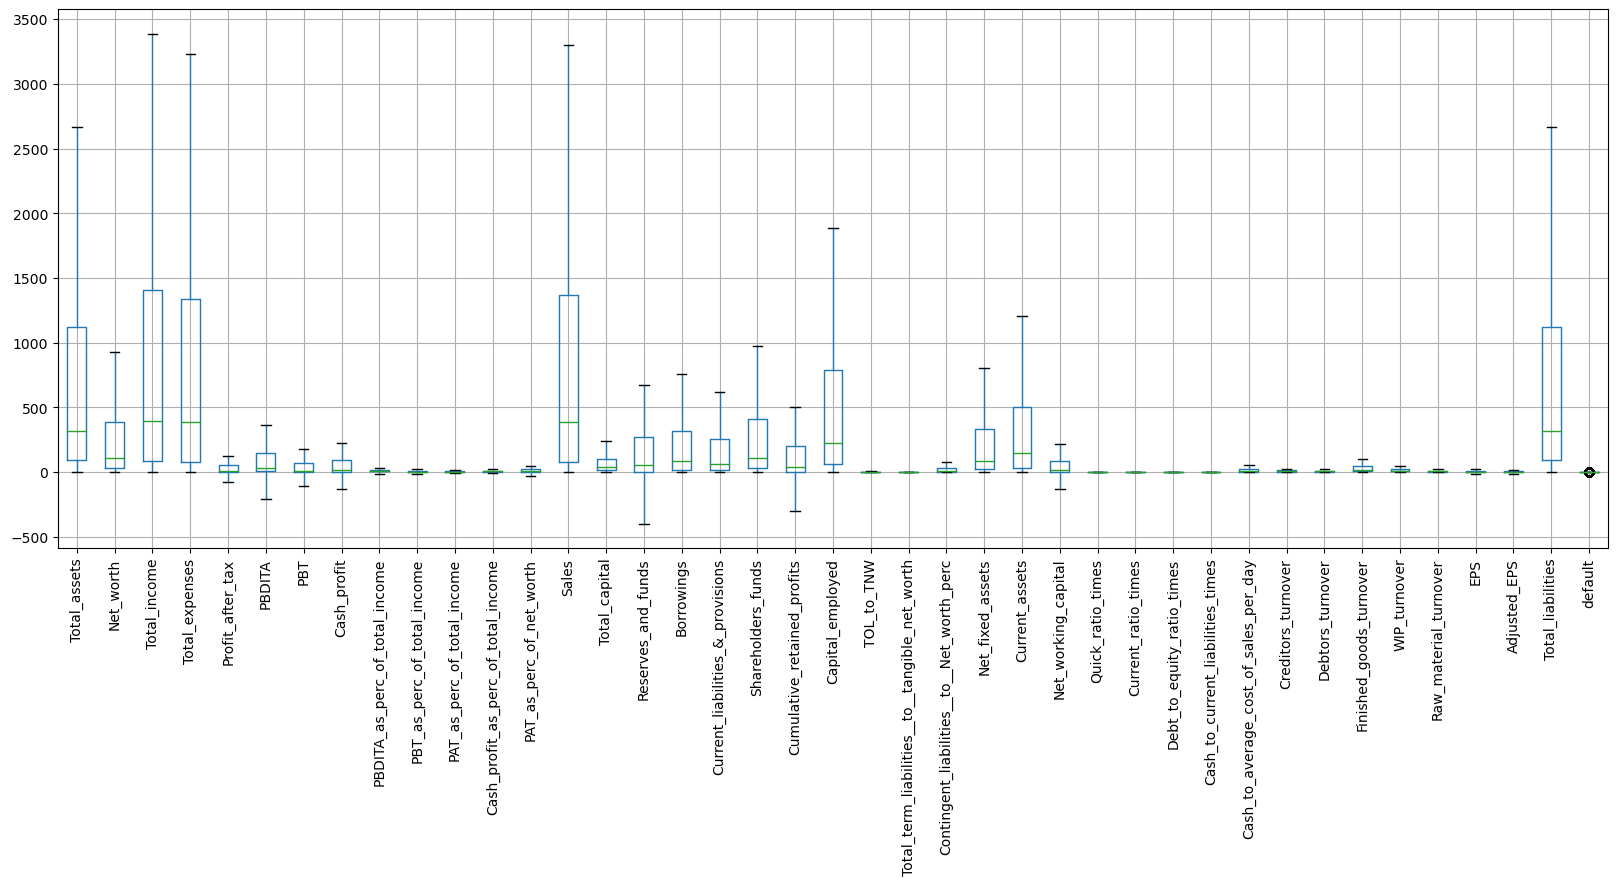

In [47]:

plt.figure(figsize=(20,7))
Default.boxplot()
plt.xticks(rotation=90)
plt.show()


In [48]:
import statsmodels.formula.api as SM


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [50]:
X = Default.drop('default', axis = 1)
y = Default['default']


In [51]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
0,Total_assets,inf
39,Total_liabilities,inf
2,Total_income,462.917355
13,Sales,431.494073
3,Total_expenses,305.340265
18,Shareholders_funds,205.492414
1,Net_worth,180.809313
20,Capital_employed,146.046874
6,PBT,82.190467
4,Profit_after_tax,77.593556


In [52]:
X = X.drop('Total_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
1,Total_income,462.917355
12,Sales,431.494073
2,Total_expenses,305.340265
17,Shareholders_funds,205.492414
0,Net_worth,180.809313
38,Total_liabilities,174.006706
19,Capital_employed,146.046874
5,PBT,82.190467
3,Profit_after_tax,77.593556
4,PBDITA,47.728097


In [53]:
X = X.drop('Total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
1,Total_expenses,253.938925
11,Sales,248.922114
16,Shareholders_funds,205.488387
0,Net_worth,180.587605
37,Total_liabilities,173.311954
18,Capital_employed,145.570529
4,PBT,82.159131
2,Profit_after_tax,77.519552
3,PBDITA,41.623561
7,PBT_as_perc_of_total_income,36.434774


In [54]:
X = X.drop('Total_expenses', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
15,Shareholders_funds,204.032365
0,Net_worth,179.839714
36,Total_liabilities,173.297397
17,Capital_employed,145.541589
3,PBT,81.832293
1,Profit_after_tax,76.815834
2,PBDITA,41.299589
6,PBT_as_perc_of_total_income,36.407380
7,PAT_as_perc_of_total_income,34.047032
22,Current_assets,31.941304


In [55]:
X = X.drop('Shareholders_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
35,Total_liabilities,173.289562
16,Capital_employed,137.928325
3,PBT,81.829545
1,Profit_after_tax,76.774195
2,PBDITA,41.288842
0,Net_worth,41.015094
6,PBT_as_perc_of_total_income,36.406989
7,PAT_as_perc_of_total_income,34.041244
21,Current_assets,31.932940
4,Cash_profit,29.956386


In [56]:
X = X.drop('Total_liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
3,PBT,81.386135
1,Profit_after_tax,76.648945
16,Capital_employed,64.930717
2,PBDITA,41.034238
0,Net_worth,41.015093
6,PBT_as_perc_of_total_income,36.405774
7,PAT_as_perc_of_total_income,34.040107
21,Current_assets,30.832805
4,Cash_profit,29.953962
10,Sales,20.317770


In [57]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
15,Capital_employed,64.336283
0,Net_worth,40.873835
2,PBDITA,39.704379
5,PBT_as_perc_of_total_income,30.945088
20,Current_assets,30.761907
3,Cash_profit,29.811653
6,PAT_as_perc_of_total_income,29.402804
9,Sales,20.286341
13,Current_liabilities_&_provisions,18.807103
11,Reserves_and_funds,18.262551


In [58]:
X = X.drop('Capital_employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
2,PBDITA,38.479934
5,PBT_as_perc_of_total_income,30.921975
3,Cash_profit,29.676355
6,PAT_as_perc_of_total_income,29.277495
19,Current_assets,28.650616
0,Net_worth,26.036777
9,Sales,20.062414
13,Current_liabilities_&_provisions,18.496326
11,Reserves_and_funds,18.258769
22,Current_ratio_times,17.695313


In [59]:
X = X.drop('PBDITA', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
4,PBT_as_perc_of_total_income,30.704410
5,PAT_as_perc_of_total_income,29.219297
18,Current_assets,28.556394
0,Net_worth,25.713793
2,Cash_profit,20.324953
8,Sales,19.479681
12,Current_liabilities_&_provisions,18.398078
10,Reserves_and_funds,18.230914
21,Current_ratio_times,17.617110
20,Quick_ratio_times,17.405354


In [60]:
X = X.drop('PBT_as_perc_of_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
17,Current_assets,28.546339
0,Net_worth,25.698398
2,Cash_profit,20.306140
7,Sales,19.397273
11,Current_liabilities_&_provisions,18.383718
9,Reserves_and_funds,18.228192
20,Current_ratio_times,17.568064
19,Quick_ratio_times,17.405337
1,Profit_after_tax,15.149022
29,EPS,14.298916


In [61]:
X = X.drop('Current_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
0,Net_worth,24.926348
2,Cash_profit,20.216339
9,Reserves_and_funds,18.211185
19,Current_ratio_times,17.525763
7,Sales,17.438062
18,Quick_ratio_times,17.400532
1,Profit_after_tax,15.149022
28,EPS,14.298128
11,Current_liabilities_&_provisions,13.301681
29,Adjusted_EPS,13.027349


In [62]:
X = X.drop('Net_worth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
1,Cash_profit,20.074071
18,Current_ratio_times,17.513571
17,Quick_ratio_times,17.400103
6,Sales,17.319812
0,Profit_after_tax,15.147265
27,EPS,14.294456
8,Reserves_and_funds,13.859601
28,Adjusted_EPS,13.027321
10,Current_liabilities_&_provisions,12.755662
19,Debt_to_equity_ratio_times,11.929668


In [63]:
X = X.drop('Cash_profit', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
17,Current_ratio_times,17.505974
16,Quick_ratio_times,17.390993
5,Sales,16.268460
26,EPS,14.294374
7,Reserves_and_funds,13.853126
27,Adjusted_EPS,13.025466
9,Current_liabilities_&_provisions,12.683090
18,Debt_to_equity_ratio_times,11.927923
10,Cumulative_retained_profits,11.327654
14,Net_fixed_assets,11.149933


In [64]:
X = X.drop('Current_ratio_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
5,Sales,16.224449
25,EPS,14.282342
7,Reserves_and_funds,13.852399
26,Adjusted_EPS,13.024292
9,Current_liabilities_&_provisions,12.683002
17,Debt_to_equity_ratio_times,11.926112
10,Cumulative_retained_profits,11.314356
14,Net_fixed_assets,11.148378
11,TOL_to_TNW,9.960014
1,PBDITA_as_perc_of_total_income,9.862056


In [65]:
X = X.drop('Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
24,EPS,14.280851
6,Reserves_and_funds,13.834008
25,Adjusted_EPS,13.024079
16,Debt_to_equity_ratio_times,11.920057
9,Cumulative_retained_profits,11.295301
13,Net_fixed_assets,10.992967
10,TOL_to_TNW,9.960013
1,PBDITA_as_perc_of_total_income,9.620181
3,Cash_profit_as_perc_of_total_income,9.363785
8,Current_liabilities_&_provisions,8.576875


In [66]:
X = X.drop('EPS', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
6,Reserves_and_funds,13.822249
16,Debt_to_equity_ratio_times,11.918617
9,Cumulative_retained_profits,11.273566
13,Net_fixed_assets,10.932320
10,TOL_to_TNW,9.959863
1,PBDITA_as_perc_of_total_income,9.619815
3,Cash_profit_as_perc_of_total_income,9.363446
8,Current_liabilities_&_provisions,8.540725
7,Borrowings,8.367954
11,Total_term_liabilities__to__tangible_net_worth,7.999379


In [67]:
X = X.drop('Reserves_and_funds', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
15,Debt_to_equity_ratio_times,11.913178
12,Net_fixed_assets,10.429462
9,TOL_to_TNW,9.919186
1,PBDITA_as_perc_of_total_income,9.618470
3,Cash_profit_as_perc_of_total_income,9.362790
6,Borrowings,8.357413
7,Current_liabilities_&_provisions,8.326115
10,Total_term_liabilities__to__tangible_net_worth,7.992571
16,Cash_to_current_liabilities_times,7.895728
0,Profit_after_tax,6.524653


In [68]:
X = X.drop('Debt_to_equity_ratio_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
12,Net_fixed_assets,10.405230
1,PBDITA_as_perc_of_total_income,9.524318
3,Cash_profit_as_perc_of_total_income,9.307497
7,Current_liabilities_&_provisions,8.144624
6,Borrowings,7.890814
15,Cash_to_current_liabilities_times,7.887632
9,TOL_to_TNW,7.182709
0,Profit_after_tax,6.524645
2,PAT_as_perc_of_total_income,6.473875
10,Total_term_liabilities__to__tangible_net_worth,6.001500


In [69]:
X = X.drop('Net_fixed_assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
1,PBDITA_as_perc_of_total_income,9.519118
3,Cash_profit_as_perc_of_total_income,9.222250
14,Cash_to_current_liabilities_times,7.864403
7,Current_liabilities_&_provisions,7.669608
9,TOL_to_TNW,7.001131
0,Profit_after_tax,6.516537
2,PAT_as_perc_of_total_income,6.459318
10,Total_term_liabilities__to__tangible_net_worth,5.849904
13,Quick_ratio_times,5.815744
6,Borrowings,5.768856


In [70]:
X = X.drop('PBDITA_as_perc_of_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
6,Current_liabilities_&_provisions,7.658381
13,Cash_to_current_liabilities_times,7.641577
8,TOL_to_TNW,6.943848
0,Profit_after_tax,6.513744
1,PAT_as_perc_of_total_income,6.149620
9,Total_term_liabilities__to__tangible_net_worth,5.831159
5,Borrowings,5.759972
12,Quick_ratio_times,5.669881
18,WIP_turnover,5.569314
2,Cash_profit_as_perc_of_total_income,5.377353


In [71]:
X = X.drop('Current_liabilities_&_provisions', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
12,Cash_to_current_liabilities_times,7.608804
7,TOL_to_TNW,6.329932
0,Profit_after_tax,6.291190
1,PAT_as_perc_of_total_income,6.142213
11,Quick_ratio_times,5.668414
17,WIP_turnover,5.566938
8,Total_term_liabilities__to__tangible_net_worth,5.477307
2,Cash_profit_as_perc_of_total_income,5.359957
13,Cash_to_average_cost_of_sales_per_day,5.152240
5,Borrowings,4.910348


In [72]:
X = X.drop('Cash_to_current_liabilities_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
0,Profit_after_tax,6.262408
1,PAT_as_perc_of_total_income,6.123526
7,TOL_to_TNW,5.933156
16,WIP_turnover,5.565885
8,Total_term_liabilities__to__tangible_net_worth,5.402812
2,Cash_profit_as_perc_of_total_income,5.281154
5,Borrowings,4.901228
15,Finished_goods_turnover,4.552812
6,Cumulative_retained_profits,4.438062
11,Quick_ratio_times,4.126211


In [73]:
X = X.drop('Profit_after_tax', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
6,TOL_to_TNW,5.931095
0,PAT_as_perc_of_total_income,5.855826
15,WIP_turnover,5.562561
7,Total_term_liabilities__to__tangible_net_worth,5.402769
1,Cash_profit_as_perc_of_total_income,5.233232
4,Borrowings,4.862540
14,Finished_goods_turnover,4.548493
10,Quick_ratio_times,4.104632
12,Creditors_turnover,3.650718
3,Total_capital,3.577375


In [74]:
X = X.drop('TOL_to_TNW', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
0,PAT_as_perc_of_total_income,5.833815
14,WIP_turnover,5.560287
1,Cash_profit_as_perc_of_total_income,5.208447
4,Borrowings,4.859827
13,Finished_goods_turnover,4.500541
9,Quick_ratio_times,4.102693
11,Creditors_turnover,3.638156
3,Total_capital,3.576679
12,Debtors_turnover,3.550373
2,PAT_as_perc_of_net_worth,3.191414


In [75]:
X = X.drop('PAT_as_perc_of_total_income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
13,WIP_turnover,5.558199
3,Borrowings,4.851571
12,Finished_goods_turnover,4.500461
8,Quick_ratio_times,4.088442
10,Creditors_turnover,3.638155
2,Total_capital,3.576167
11,Debtors_turnover,3.549693
4,Cumulative_retained_profits,3.004714
14,Raw_material_turnover,2.948700
0,Cash_profit_as_perc_of_total_income,2.765862


In [76]:

X = X.drop('WIP_turnover', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)


,variables,VIF
3,Borrowings,4.849900
8,Quick_ratio_times,4.004498
10,Creditors_turnover,3.579060
2,Total_capital,3.575055
11,Debtors_turnover,3.486647
4,Cumulative_retained_profits,3.003792
13,Raw_material_turnover,2.927046
0,Cash_profit_as_perc_of_total_income,2.760219
1,PAT_as_perc_of_net_worth,2.511117
9,Cash_to_average_cost_of_sales_per_day,2.298673


In [77]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [79]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)


In [80]:
Default_train.shape


(2979, 16)

In [81]:
Default_test.shape


(1277, 16)

In [82]:
Default_train.columns


Index(['Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Total_capital', 'Borrowings', 'Cumulative_retained_profits',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_working_capital',
       'Quick_ratio_times', 'Cash_to_average_cost_of_sales_per_day',
       'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover',
       'Raw_material_turnover', 'Adjusted_EPS', 'default'],
      dtype='object')

In [83]:
f_1 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_capital + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover + Adjusted_EPS'



In [84]:
model_1 = SM.logit(formula = f_1, data=Default_train).fit()


Optimization terminated successfully.
         Current function value: 0.507790
         Iterations 5


In [85]:
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2963
Method:                           MLE   Df Model:                           15
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03676
Time:                        10:34:50   Log-Likelihood:                -1512.7
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 1.423e-17
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3918      0.146     -9.505      0.000      -1.679      -1.105
Cash_profit_as_perc_of_total_income               -0.0199      0.007     -2.713      0.007      -0.034      -0.006
PAT_as_perc_of_net_worth                          -0.0112      0.003     -3.335      0.001      -0.018      -0.005
Total_capital                                      0.0010      0.001      1.280      0.200      -0.001       0.003
Borrowings                                        -0.0002      0.000     -0.755      0.450      -0.001       0.000
Cumulative_retained_profits                       -0.0001      0.000     -0.297      0.766      -0.001       0.001
Total_term_liabilities__to__tangible_net_worth     0.2566      0.064      4.010      0.000       0.131       0.382
Contingent_liabilities__to__Net_worth_perc         0.0019      0.002      1.068      0.286      -0.002       0.005
Net_working_capital                               -0.0002      0.001     -0.410      0.682      -0.001       0.001
Quick_ratio_times                                 -0.1915      0.103     -1.866      0.062      -0.393       0.010
Cash_to_average_cost_of_sales_per_day              0.0089      0.003      3.356      0.001       0.004       0.014
Creditors_turnover                                 0.0105      0.007      1.421      0.155      -0.004       0.025
Debtors_turnover                                   0.0056      0.008      0.727      0.467      -0.009       0.021
Finished_goods_turnover                            0.0024      0.001      1.573      0.116      -0.001       0.005
Raw_material_turnover                             -0.0146      0.007     -2.029      0.042      -0.029      -0.000
Adjusted_EPS                                       0.0028      0.008      0.358      0.721      -0.013       0.018
==================================================================================================================
"""

# Cumulative_retained_profits	has highest p value

In [86]:
f_2 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_capital + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover + Adjusted_EPS'


In [87]:
model_2 = SM.logit(formula = f_2, data=Default_train).fit()


Optimization terminated successfully.
         Current function value: 0.507805
         Iterations 5


In [88]:
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2964
Method:                           MLE   Df Model:                           14
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03674
Time:                        10:34:50   Log-Likelihood:                -1512.8
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 5.018e-18
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3975      0.145     -9.622      0.000      -1.682      -1.113
Cash_profit_as_perc_of_total_income               -0.0201      0.007     -2.765      0.006      -0.034      -0.006
PAT_as_perc_of_net_worth                          -0.0112      0.003     -3.338      0.001      -0.018      -0.005
Total_capital                                      0.0011      0.001      1.311      0.190      -0.001       0.003
Borrowings                                        -0.0003      0.000     -0.971      0.332      -0.001       0.000
Total_term_liabilities__to__tangible_net_worth     0.2635      0.060      4.410      0.000       0.146       0.381
Contingent_liabilities__to__Net_worth_perc         0.0019      0.002      1.074      0.283      -0.002       0.005
Net_working_capital                               -0.0003      0.001     -0.512      0.608      -0.001       0.001
Quick_ratio_times                                 -0.1902      0.103     -1.855      0.064      -0.391       0.011
Cash_to_average_cost_of_sales_per_day              0.0089      0.003      3.356      0.001       0.004       0.014
Creditors_turnover                                 0.0106      0.007      1.432      0.152      -0.004       0.025
Debtors_turnover                                   0.0055      0.008      0.713      0.476      -0.010       0.020
Finished_goods_turnover                            0.0024      0.001      1.588      0.112      -0.001       0.005
Raw_material_turnover                             -0.0146      0.007     -2.027      0.043      -0.029      -0.000
Adjusted_EPS                                       0.0022      0.008      0.287      0.774      -0.013       0.017
==================================================================================================================
"""

# Adjusted_EPS has highest p value

In [89]:
f_3 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_capital + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover'


In [90]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()


Optimization terminated successfully.
         Current function value: 0.507819
         Iterations 5


In [91]:
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2965
Method:                           MLE   Df Model:                           13
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03671
Time:                        10:34:50   Log-Likelihood:                -1512.8
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 1.699e-18
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3937      0.145     -9.639      0.000      -1.677      -1.110
Cash_profit_as_perc_of_total_income               -0.0198      0.007     -2.758      0.006      -0.034      -0.006
PAT_as_perc_of_net_worth                          -0.0109      0.003     -3.434      0.001      -0.017      -0.005
Total_capital                                      0.0010      0.001      1.282      0.200      -0.001       0.003
Borrowings                                        -0.0002      0.000     -0.937      0.349      -0.001       0.000
Total_term_liabilities__to__tangible_net_worth     0.2609      0.059      4.416      0.000       0.145       0.377
Contingent_liabilities__to__Net_worth_perc         0.0019      0.002      1.079      0.280      -0.002       0.005
Net_working_capital                               -0.0003      0.001     -0.480      0.631      -0.001       0.001
Quick_ratio_times                                 -0.1912      0.102     -1.867      0.062      -0.392       0.010
Cash_to_average_cost_of_sales_per_day              0.0089      0.003      3.367      0.001       0.004       0.014
Creditors_turnover                                 0.0105      0.007      1.423      0.155      -0.004       0.025
Debtors_turnover                                   0.0055      0.008      0.724      0.469      -0.009       0.021
Finished_goods_turnover                            0.0024      0.001      1.600      0.110      -0.001       0.005
Raw_material_turnover                             -0.0145      0.007     -2.017      0.044      -0.029      -0.000
==================================================================================================================
"""

# Net_working_capital	has highest p value

In [92]:
f_4 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_capital + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover'


In [93]:
model_4 = SM.logit(formula = f_4, data=Default_train).fit()


Optimization terminated successfully.
         Current function value: 0.507857
         Iterations 5


In [94]:
model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2966
Method:                           MLE   Df Model:                           12
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03664
Time:                        10:34:50   Log-Likelihood:                -1512.9
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 5.909e-19
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3872      0.144     -9.641      0.000      -1.669      -1.105
Cash_profit_as_perc_of_total_income               -0.0198      0.007     -2.756      0.006      -0.034      -0.006
PAT_as_perc_of_net_worth                          -0.0111      0.003     -3.530      0.000      -0.017      -0.005
Total_capital                                      0.0010      0.001      1.250      0.211      -0.001       0.003
Borrowings                                        -0.0003      0.000     -1.042      0.297      -0.001       0.000
Total_term_liabilities__to__tangible_net_worth     0.2625      0.059      4.447      0.000       0.147       0.378
Contingent_liabilities__to__Net_worth_perc         0.0019      0.002      1.097      0.273      -0.002       0.005
Quick_ratio_times                                 -0.2059      0.098     -2.104      0.035      -0.398      -0.014
Cash_to_average_cost_of_sales_per_day              0.0089      0.003      3.374      0.001       0.004       0.014
Creditors_turnover                                 0.0099      0.007      1.364      0.173      -0.004       0.024
Debtors_turnover                                   0.0058      0.008      0.756      0.449      -0.009       0.021
Finished_goods_turnover                            0.0025      0.001      1.648      0.099      -0.000       0.005
Raw_material_turnover                             -0.0143      0.007     -1.991      0.046      -0.028      -0.000
==================================================================================================================
"""

## Debtors turnover has highest p value 

In [95]:
f_5 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_capital + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Finished_goods_turnover + Raw_material_turnover'


In [96]:
model_5 = SM.logit(formula = f_5, data=Default_train).fit()


Optimization terminated successfully.
         Current function value: 0.507953
         Iterations 5


In [97]:
model_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2967
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03646
Time:                        10:34:50   Log-Likelihood:                -1513.2
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 2.301e-19
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3518      0.136     -9.937      0.000      -1.618      -1.085
Cash_profit_as_perc_of_total_income               -0.0192      0.007     -2.693      0.007      -0.033      -0.005
PAT_as_perc_of_net_worth                          -0.0110      0.003     -3.506      0.000      -0.017      -0.005
Total_capital                                      0.0010      0.001      1.277      0.202      -0.001       0.003
Borrowings                                        -0.0003      0.000     -1.061      0.289      -0.001       0.000
Total_term_liabilities__to__tangible_net_worth     0.2636      0.059      4.467      0.000       0.148       0.379
Contingent_liabilities__to__Net_worth_perc         0.0020      0.002      1.127      0.260      -0.001       0.005
Quick_ratio_times                                 -0.2330      0.091     -2.555      0.011      -0.412      -0.054
Cash_to_average_cost_of_sales_per_day              0.0090      0.003      3.416      0.001       0.004       0.014
Creditors_turnover                                 0.0122      0.007      1.829      0.067      -0.001       0.025
Finished_goods_turnover                            0.0025      0.001      1.672      0.095      -0.000       0.005
Raw_material_turnover                             -0.0133      0.007     -1.888      0.059      -0.027       0.001
==================================================================================================================
"""

## Borrowings has highest p value 

In [98]:
f_6 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_capital + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Finished_goods_turnover + Raw_material_turnover'


In [99]:
model_6 = SM.logit(formula = f_6, data=Default_train).fit()


Optimization terminated successfully.
         Current function value: 0.508143
         Iterations 5


In [100]:
model_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2968
Method:                           MLE   Df Model:                           10
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03610
Time:                        10:34:50   Log-Likelihood:                -1513.8
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 1.114e-19
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3554      0.136     -9.963      0.000      -1.622      -1.089
Cash_profit_as_perc_of_total_income               -0.0192      0.007     -2.699      0.007      -0.033      -0.005
PAT_as_perc_of_net_worth                          -0.0116      0.003     -3.718      0.000      -0.018      -0.005
Total_capital                                      0.0005      0.001      0.768      0.443      -0.001       0.002
Total_term_liabilities__to__tangible_net_worth     0.2470      0.057      4.339      0.000       0.135       0.359
Contingent_liabilities__to__Net_worth_perc         0.0017      0.002      0.990      0.322      -0.002       0.005
Quick_ratio_times                                 -0.2229      0.091     -2.455      0.014      -0.401      -0.045
Cash_to_average_cost_of_sales_per_day              0.0090      0.003      3.432      0.001       0.004       0.014
Creditors_turnover                                 0.0115      0.007      1.733      0.083      -0.002       0.024
Finished_goods_turnover                            0.0027      0.001      1.814      0.070      -0.000       0.006
Raw_material_turnover                             -0.0133      0.007     -1.889      0.059      -0.027       0.000
==================================================================================================================
"""

## Total capital has highest p value 

In [101]:
f_7 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Finished_goods_turnover + Raw_material_turnover'


In [102]:
model_7 = SM.logit(formula = f_7, data=Default_train).fit()
model_7.summary()


Optimization terminated successfully.
         Current function value: 0.508241
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2969
Method:                           MLE   Df Model:                            9
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03591
Time:                        10:34:50   Log-Likelihood:                -1514.1
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 3.982e-20
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3327      0.133    -10.040      0.000      -1.593      -1.073
Cash_profit_as_perc_of_total_income               -0.0188      0.007     -2.645      0.008      -0.033      -0.005
PAT_as_perc_of_net_worth                          -0.0115      0.003     -3.691      0.000      -0.018      -0.005
Total_term_liabilities__to__tangible_net_worth     0.2501      0.057      4.405      0.000       0.139       0.361
Contingent_liabilities__to__Net_worth_perc         0.0021      0.002      1.239      0.215      -0.001       0.005
Quick_ratio_times                                 -0.2285      0.090     -2.527      0.011      -0.406      -0.051
Cash_to_average_cost_of_sales_per_day              0.0092      0.003      3.502      0.000       0.004       0.014
Creditors_turnover                                 0.0116      0.007      1.752      0.080      -0.001       0.025
Finished_goods_turnover                            0.0027      0.001      1.802      0.072      -0.000       0.006
Raw_material_turnover                             -0.0134      0.007     -1.897      0.058      -0.027       0.000
==================================================================================================================
"""

## Contingent_liabilities__to__Net_worth_perc

In [103]:
f_8 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Finished_goods_turnover + Raw_material_turnover'


In [104]:
model_8 = SM.logit(formula = f_8, data=Default_train).fit()
model_8.summary()


Optimization terminated successfully.
         Current function value: 0.508497
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2970
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03542
Time:                        10:34:50   Log-Likelihood:                -1514.8
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 2.096e-20
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.2917      0.128    -10.067      0.000      -1.543      -1.040
Cash_profit_as_perc_of_total_income               -0.0189      0.007     -2.664      0.008      -0.033      -0.005
PAT_as_perc_of_net_worth                          -0.0112      0.003     -3.601      0.000      -0.017      -0.005
Total_term_liabilities__to__tangible_net_worth     0.2654      0.055      4.795      0.000       0.157       0.374
Quick_ratio_times                                 -0.2460      0.089     -2.758      0.006      -0.421      -0.071
Cash_to_average_cost_of_sales_per_day              0.0093      0.003      3.525      0.000       0.004       0.014
Creditors_turnover                                 0.0113      0.007      1.715      0.086      -0.002       0.024
Finished_goods_turnover                            0.0027      0.001      1.850      0.064      -0.000       0.006
Raw_material_turnover                             -0.0130      0.007     -1.855      0.064      -0.027       0.001
==================================================================================================================
"""

## Creditors_turnover has highest p value	

In [105]:
f_9 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Finished_goods_turnover + Raw_material_turnover'


In [106]:
model_9 = SM.logit(formula = f_9, data=Default_train).fit()
model_9.summary()


Optimization terminated successfully.
         Current function value: 0.508985
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2971
Method:                           MLE   Df Model:                            7
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03450
Time:                        10:34:50   Log-Likelihood:                -1516.3
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 2.013e-20
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.2378      0.124     -9.969      0.000      -1.481      -0.994
Cash_profit_as_perc_of_total_income               -0.0183      0.007     -2.590      0.010      -0.032      -0.004
PAT_as_perc_of_net_worth                          -0.0110      0.003     -3.554      0.000      -0.017      -0.005
Total_term_liabilities__to__tangible_net_worth     0.2657      0.055      4.803      0.000       0.157       0.374
Quick_ratio_times                                 -0.2233      0.088     -2.533      0.011      -0.396      -0.051
Cash_to_average_cost_of_sales_per_day              0.0086      0.003      3.324      0.001       0.004       0.014
Finished_goods_turnover                            0.0028      0.001      1.895      0.058    -9.6e-05       0.006
Raw_material_turnover                             -0.0091      0.007     -1.375      0.169      -0.022       0.004
==================================================================================================================
"""

##  Raw_material_turnover has highest p value

In [107]:
f_10 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Finished_goods_turnover'


In [108]:
model_10 = SM.logit(formula = f_10, data=Default_train).fit()
model_10.summary()


Optimization terminated successfully.
         Current function value: 0.509306
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2972
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03389
Time:                        10:34:50   Log-Likelihood:                -1517.2
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 1.132e-20
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.3117      0.112    -11.675      0.000      -1.532      -1.092
Cash_profit_as_perc_of_total_income               -0.0174      0.007     -2.466      0.014      -0.031      -0.004
PAT_as_perc_of_net_worth                          -0.0117      0.003     -3.851      0.000      -0.018      -0.006
Total_term_liabilities__to__tangible_net_worth     0.2654      0.055      4.795      0.000       0.157       0.374
Quick_ratio_times                                 -0.2321      0.088     -2.634      0.008      -0.405      -0.059
Cash_to_average_cost_of_sales_per_day              0.0095      0.003      3.758      0.000       0.005       0.014
Finished_goods_turnover                            0.0025      0.001      1.716      0.086      -0.000       0.005
==================================================================================================================
"""

## Finished_goods_turnover

In [109]:
f_11 = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day '


In [110]:
model_11 = SM.logit(formula = f_11, data=Default_train).fit()
model_11.summary()


Optimization terminated successfully.
         Current function value: 0.509793
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2973
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                 0.03296
Time:                        10:34:50   Log-Likelihood:                -1518.7
converged:                       True   LL-Null:                       -1570.4
Covariance Type:            nonrobust   LLR p-value:                 9.482e-21
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.2356      0.103    -12.024      0.000      -1.437      -1.034
Cash_profit_as_perc_of_total_income               -0.0176      0.007     -2.510      0.012      -0.031      -0.004
PAT_as_perc_of_net_worth                          -0.0112      0.003     -3.703      0.000      -0.017      -0.005
Total_term_liabilities__to__tangible_net_worth     0.2651      0.055      4.792      0.000       0.157       0.374
Quick_ratio_times                                 -0.2169      0.087     -2.480      0.013      -0.388      -0.046
Cash_to_average_cost_of_sales_per_day              0.0089      0.002      3.552      0.000       0.004       0.014
==================================================================================================================
"""

In [111]:
y_prob_pred_train = model_11.predict(Default_train)


In [112]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)


In [113]:
from sklearn import metrics


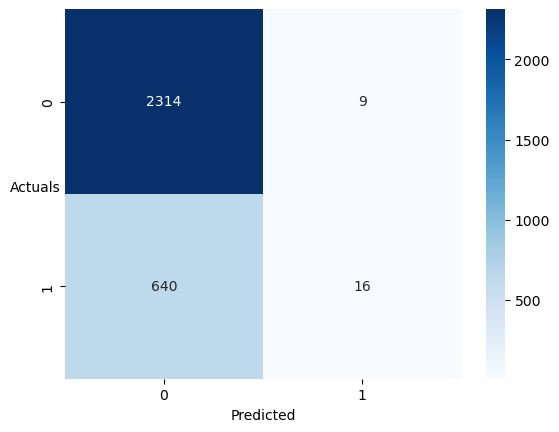

In [114]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


In [115]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))


              precision    recall  f1-score   support

         0.0      0.783     0.996     0.877      2323
         1.0      0.640     0.024     0.047       656

    accuracy                          0.782      2979
   macro avg      0.712     0.510     0.462      2979
weighted avg      0.752     0.782     0.694      2979



AUC: 0.597


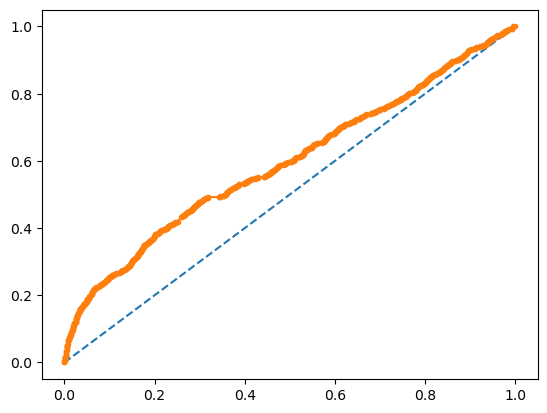

In [116]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Default_train['default'],y_prob_pred_train)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [117]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold


0.22532151558451724

In [118]:
y_class_pred1=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.225:
        a=1
    else:
        a=0
    y_class_pred1.append(a)


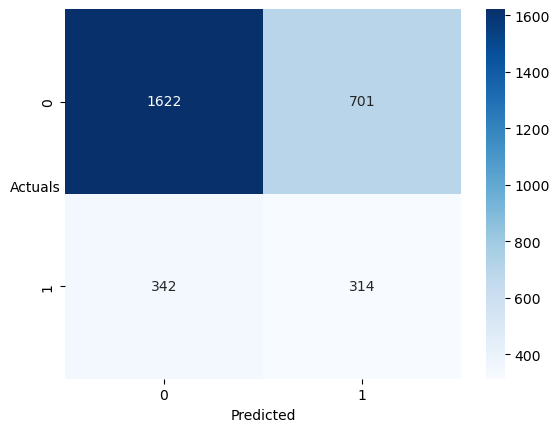

In [119]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred1)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


In [120]:
print(metrics.classification_report(Default_train['default'],y_class_pred1,digits=3))


              precision    recall  f1-score   support

         0.0      0.826     0.698     0.757      2323
         1.0      0.309     0.479     0.376       656

    accuracy                          0.650      2979
   macro avg      0.568     0.588     0.566      2979
weighted avg      0.712     0.650     0.673      2979



AUC: 0.588


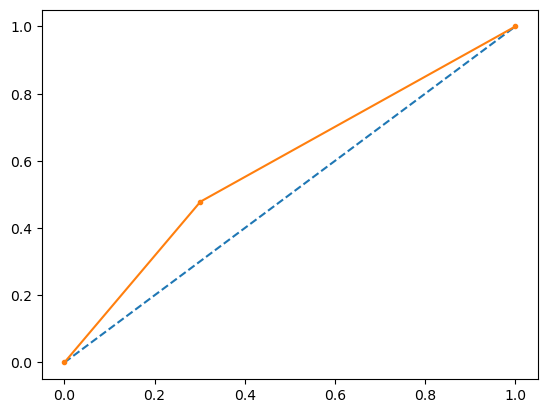

In [121]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Default_train['default'],y_class_pred1)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_class_pred1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Validating on test data

In [122]:
y_prob_pred_test = model_11.predict(Default_test)


In [123]:
y_class_pred2=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.225:
        a=1
    else:
        a=0
    y_class_pred2.append(a)


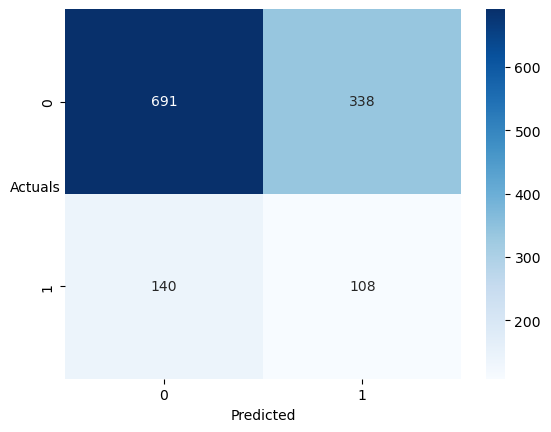

In [124]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred2)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


AUC: 0.554


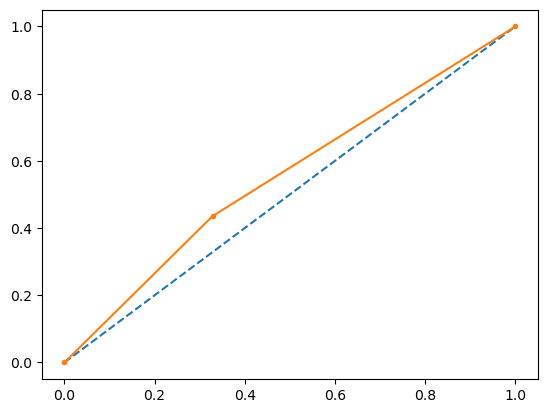

In [125]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Default_test['default'],y_class_pred2)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_test['default'],y_class_pred2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [126]:
print(metrics.classification_report(Default_test['default'],y_class_pred2,digits=3))


              precision    recall  f1-score   support

         0.0      0.832     0.672     0.743      1029
         1.0      0.242     0.435     0.311       248

    accuracy                          0.626      1277
   macro avg      0.537     0.554     0.527      1277
weighted avg      0.717     0.626     0.659      1277



In [159]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, random_state=1)
RF_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [161]:
importances = RF_model.feature_importances_

In [162]:
importances

array([0.08021296, 0.08607321, 0.06771111, 0.06245144, 0.07776428,
       0.06516686, 0.04484253, 0.06324378, 0.06854157, 0.06139279,
       0.06429824, 0.06068806, 0.0732243 , 0.06218112, 0.06220773])

In [128]:
y_train_predict2 = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict2))
print(metrics.classification_report(y_train, y_train_predict2))


0.8731117824773413
[[2249   74]
 [ 304  352]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2323
         1.0       0.83      0.54      0.65       656

    accuracy                           0.87      2979
   macro avg       0.85      0.75      0.79      2979
weighted avg       0.87      0.87      0.86      2979



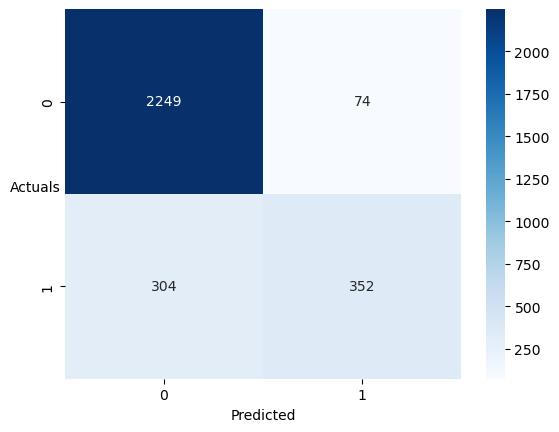

In [129]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_train_predict2)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


AUC: 0.752


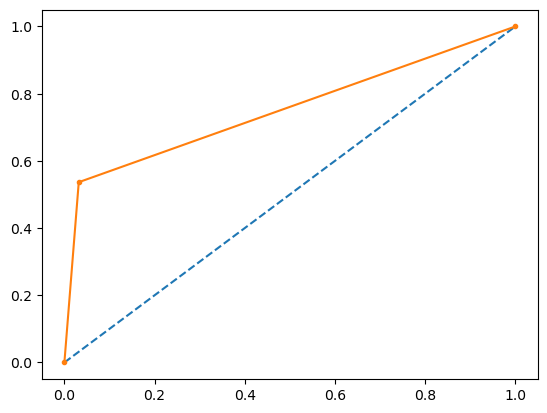

In [130]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Default_train['default'],y_train_predict2)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_train_predict2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [131]:
y_test_predict2 = RF_model.predict(X_test)
model_score_test = RF_model.score(X_test, y_test)
print(model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict2))
print(metrics.classification_report(y_test, y_test_predict2))


0.6985121378230227
[[874 155]
 [230  18]]
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      1029
         1.0       0.10      0.07      0.09       248

    accuracy                           0.70      1277
   macro avg       0.45      0.46      0.45      1277
weighted avg       0.66      0.70      0.68      1277



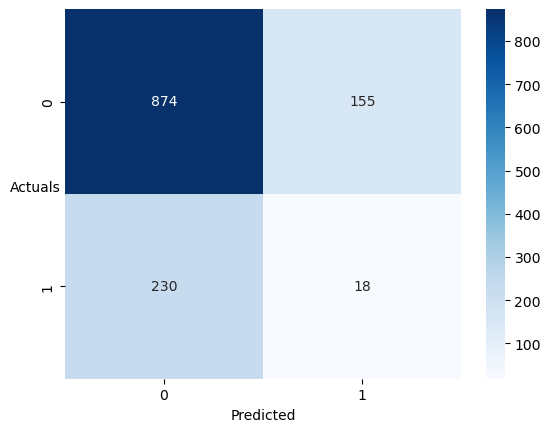

In [132]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_test_predict2)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);


AUC: 0.461


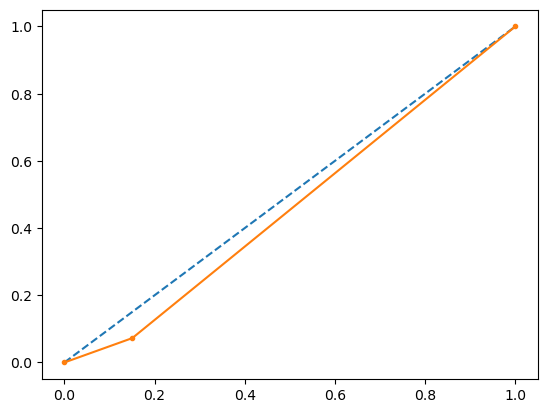

In [133]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Default_test['default'],y_test_predict2)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_test['default'],y_test_predict2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# PART B

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [135]:
stock_prices = pd.read_csv('Market_Risk_Data_coded (1).csv')


In [136]:
stock_prices.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [137]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [138]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [139]:
stock_prices.head()

,Date,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [140]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


In [141]:
stock_prices.describe()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,278.964115,528.260766,368.617225,276.827751,124.442584
std,75.114405,226.507879,182.024419,156.280781,130.090884
min,156.000000,261.000000,65.000000,110.000000,11.000000
25%,224.250000,334.000000,186.000000,166.250000,16.000000
50%,265.500000,478.000000,399.500000,213.000000,30.000000
75%,304.000000,706.750000,466.000000,360.500000,249.750000
max,493.000000,1236.000000,1035.000000,928.000000,397.000000


In [142]:
stock_prices.duplicated().sum()

0

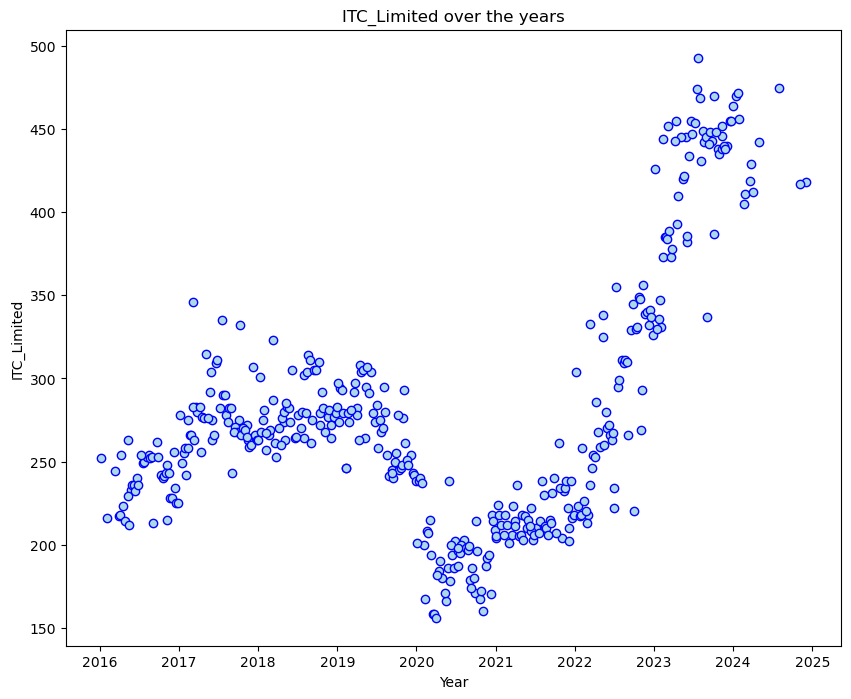

In [143]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['ITC_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('ITC_Limited')
plt.title('ITC_Limited over the years')
plt.show()

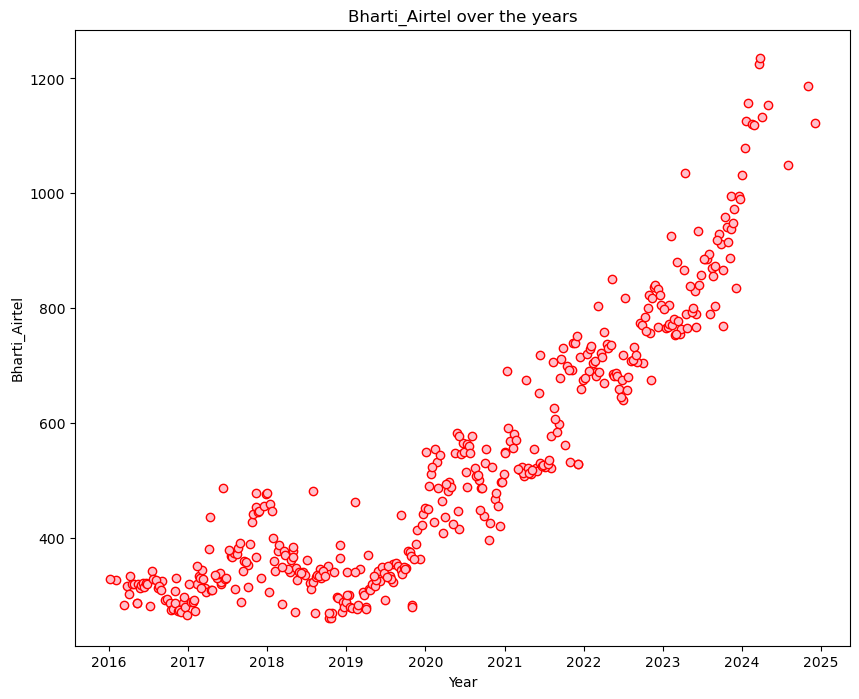

In [144]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Bharti_Airtel'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti_Airtel over the years')
plt.show()

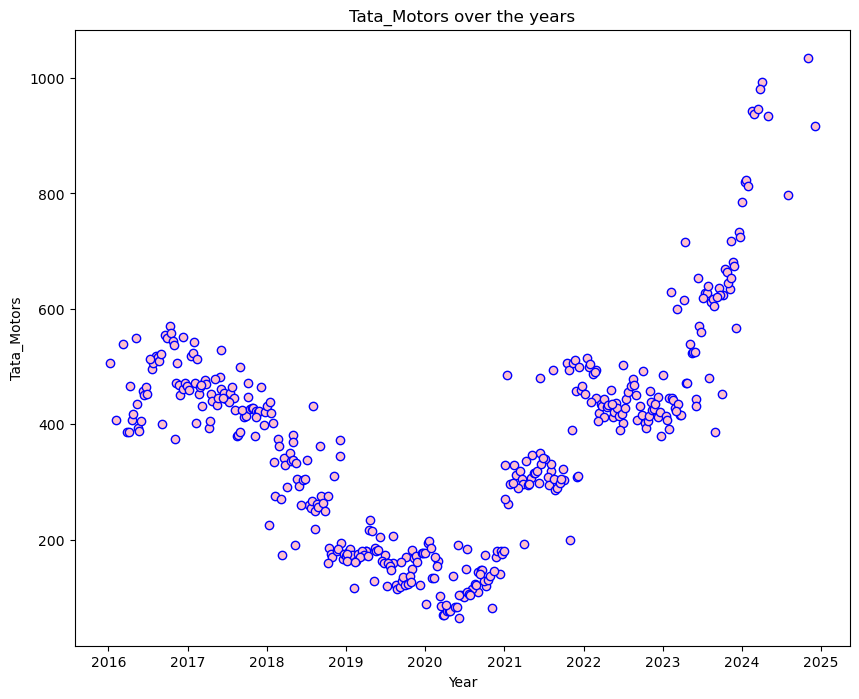

In [145]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Tata_Motors'], edgecolors='b', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Tata_Motors')
plt.title('Tata_Motors over the years')
plt.show()

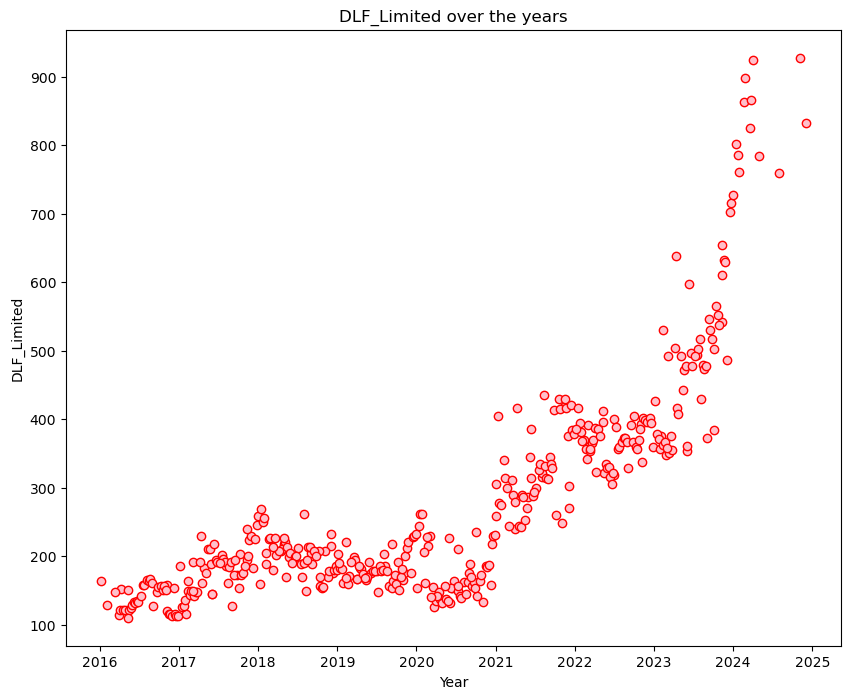

In [146]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['DLF_Limited'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF_Limited over the years')
plt.show()

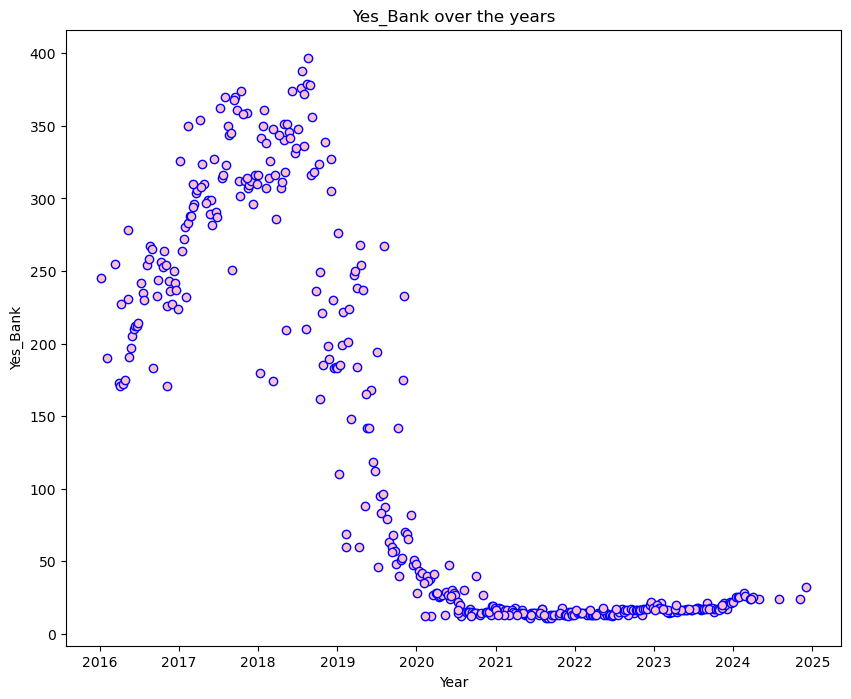

In [147]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Yes_Bank'], edgecolors='b', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Yes_Bank')
plt.title('Yes_Bank over the years')
plt.show()

In [148]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [149]:
stock_returns.head()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291


In [150]:
stock_returns.shape

(418, 5)

In [151]:
stock_means = stock_returns.mean(axis = 0)
stock_means

ITC_Limited      0.001634
Bharti_Airtel    0.003271
Tata_Motors      0.002234
DLF_Limited      0.004863
Yes_Bank        -0.004737
dtype: float64

In [152]:
stock_std = stock_returns.std(axis = 0)
stock_std

ITC_Limited      0.035904
Bharti_Airtel    0.038728
Tata_Motors      0.060484
DLF_Limited      0.057785
Yes_Bank         0.093879
dtype: float64

In [153]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_std})
df

,Average,Volatility
ITC_Limited,0.001634,0.035904
Bharti_Airtel,0.003271,0.038728
Tata_Motors,0.002234,0.060484
DLF_Limited,0.004863,0.057785
Yes_Bank,-0.004737,0.093879


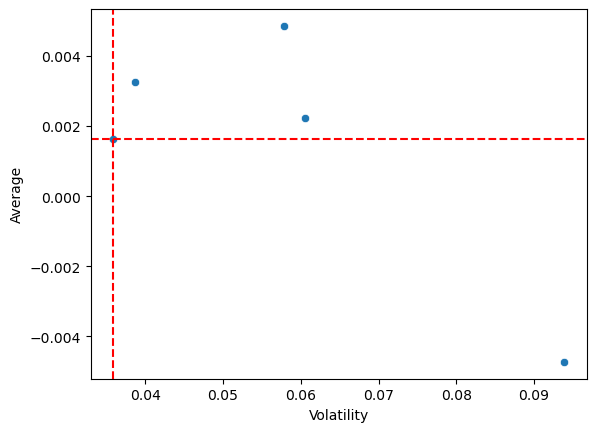

In [154]:
plot = sns.scatterplot(x = df['Volatility'], y = df['Average'])
plot.axvline(x=0.035904,linestyle='--', color = "red")
plot.axhline(y=0.001634,linestyle='--', color = "red")
plt.show()

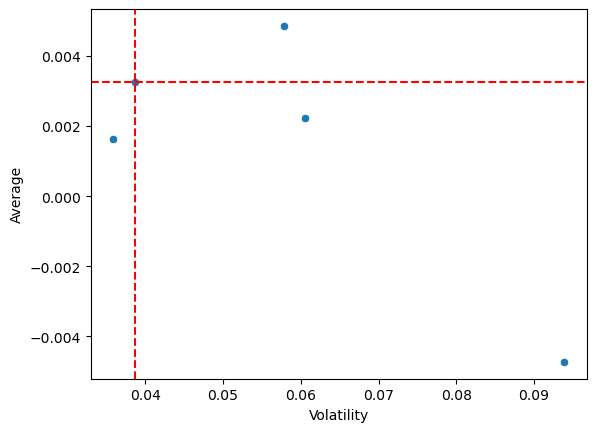

In [155]:
plot = sns.scatterplot(x = df['Volatility'], y = df['Average'])
plot.axvline(x=0.038728,linestyle='--', color = "red")
plot.axhline(y=0.003271,linestyle='--', color = "red")
plt.show()

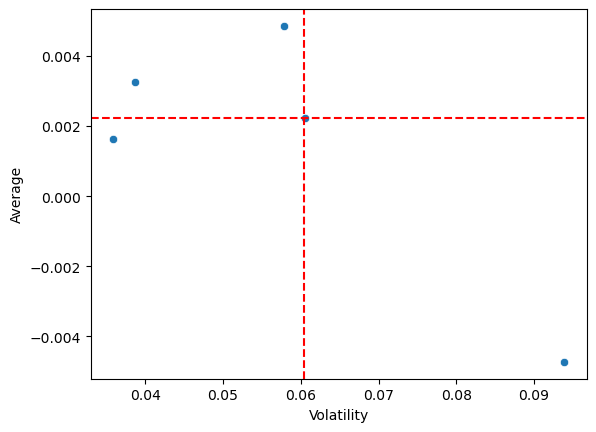

In [156]:
plot = sns.scatterplot(x = df['Volatility'], y = df['Average'])
plot.axvline(x=0.060484,linestyle='--', color = "red")
plot.axhline(y=0.002234,linestyle='--', color = "red")
plt.show()

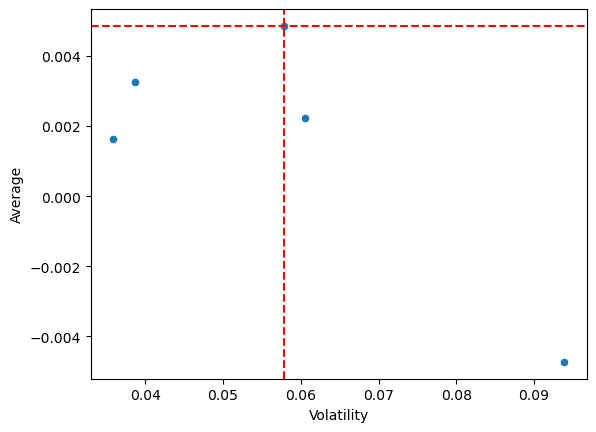

In [157]:
plot = sns.scatterplot(x = df['Volatility'], y = df['Average'])
plot.axvline(x=0.057785,linestyle='--', color = "red")
plot.axhline(y=0.004863,linestyle='--', color = "red")
plt.show()

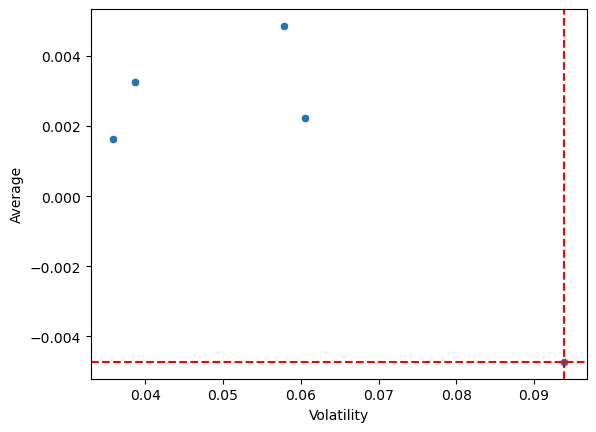

In [158]:
plot = sns.scatterplot(x = df['Volatility'], y = df['Average'])
plot.axvline(x=0.093879,linestyle='--', color = "red")
plot.axhline(y=-0.004737,linestyle='--', color = "red")
plt.show()